In [11]:
import pgmpy.models
import networkx as nx
import pylab
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete.CPD import TabularCPD
from pgmpy.inference import VariableElimination

In [4]:
Alarm_network = BayesianNetwork()
Alarm_network.add_edges_from([('Burglary', 'Alarm'), ('Earthquake', 'Alarm'), ('Alarm', 'Mary'), ('Alarm', 'John')])

In [5]:
burglary_cpd = TabularCPD('Burglary', 2, [[0.001],[0.999]],
    state_names={'Burglary': ['T', 'F']})

earthquake_cpd = TabularCPD('Earthquake', 2, [[0.002],[0.998]],
    state_names={'Earthquake': ['T', 'F']})

alarm_cpd = TabularCPD('Alarm', 2, [[0.95, 0.94, 0.29, 0.001],
                                    [0.05, 0.06, 0.71, 0.999]],
    evidence=['Burglary', 'Earthquake'], evidence_card=[2, 2],
    state_names={
        'Alarm': ['T', 'F'],
        'Burglary': ['T', 'F'],
        'Earthquake': ['T', 'F']})

mary_cpd = TabularCPD('Mary', 2, [[0.7, 0.01], [0.3, 0.99]],
    evidence=['Alarm'], evidence_card=[2],
    state_names={
        'Alarm': ['T', 'F'],
        'Mary': ['T', 'F']})

john_cpd = TabularCPD('John', 2, [[0.9, 0.05], [0.1, 0.95]],
    evidence=['Alarm'], evidence_card=[2],
    state_names={
        'Alarm': ['T', 'F'],
        'John': ['T', 'F']})

In [34]:
Alarm_network.add_cpds(burglary_cpd)
Alarm_network.add_cpds(earthquake_cpd)
Alarm_network.add_cpds(alarm_cpd)
Alarm_network.add_cpds(mary_cpd)
Alarm_network.add_cpds(john_cpd)

print('Burglary \n', burglary_cpd)
print('\n Earthquake \n', earthquake_cpd)
print('\n Alarm sounds \n', alarm_cpd)
print('\n Mary calls \n', mary_cpd)
print('\n John calls \n', john_cpd)

Burglary 
 +-------------+-------+
| Burglary(T) | 0.001 |
+-------------+-------+
| Burglary(F) | 0.999 |
+-------------+-------+

 Earthquake 
 +---------------+-------+
| Earthquake(T) | 0.002 |
+---------------+-------+
| Earthquake(F) | 0.998 |
+---------------+-------+

 Alarm sounds 
 +------------+---------------+---------------+---------------+---------------+
| Burglary   | Burglary(T)   | Burglary(T)   | Burglary(F)   | Burglary(F)   |
+------------+---------------+---------------+---------------+---------------+
| Earthquake | Earthquake(T) | Earthquake(F) | Earthquake(T) | Earthquake(F) |
+------------+---------------+---------------+---------------+---------------+
| Alarm(T)   | 0.95          | 0.94          | 0.29          | 0.001         |
+------------+---------------+---------------+---------------+---------------+
| Alarm(F)   | 0.05          | 0.06          | 0.71          | 0.999         |
+------------+---------------+---------------+---------------+-------------

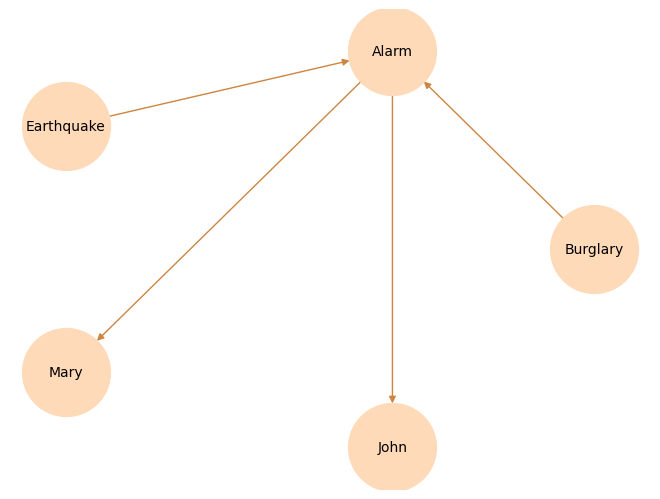

In [112]:
nx.draw_circular(Alarm_network, with_labels=True, node_size=4000, node_color="peachpuff", font_size=10, arrowsize=10, linewidths=1, edge_color="peru")
pylab.savefig(r"C:\Users\prebe\ikt215\Exam\figures\bayesian_network_alarm.png")

In [40]:
inference = VariableElimination(Alarm_network)
b = inference.query(['Burglary'])
e = inference.query(['Earthquake'])
a = inference.query(['Alarm'], evidence={'Burglary': 'F', 'Earthquake': 'F'})
m = inference.query(['Mary'], evidence={'Alarm': 'T'})
j = inference.query(['John'], evidence={'Alarm': 'T'})

joint_probability = b.values[1] * e.values[1] * a.values[0] * m.values[0] * j.values[0]
print('Probability of the alarm sounding with no burglary, no earthquake, and both Mary and John calls \n', joint_probability)

b = inference.query(['Burglary'])
e = inference.query(['Earthquake'])
a = inference.query(['Alarm'], evidence={'Burglary': 'T', 'Earthquake': 'F'})
m = inference.query(['Mary'], evidence={'Alarm': 'T'})
j = inference.query(['John'], evidence={'Alarm': 'T'})

joint_probability = b.values[0] * e.values[1] * a.values[0] * m.values[1] * j.values[0]
print('Probability of the alarm sounding with burglary, but no earthquake, and John calls, but Mary does not \n', joint_probability)

Probability of the alarm sounding with no burglary, no earthquake, and both Mary and John calls 
 0.0006281112599999998
Probability of the alarm sounding with burglary, but no earthquake, and John calls, but Mary does not 
 0.0002532924


# Student's mark

In [42]:
Student_network = BayesianNetwork()
Student_network.add_edges_from([('Exam level', 'Marks'), ('IQ level', 'Marks'), ('IQ level', 'Apti. score'), ('Marks', 'Admission')])

In [85]:
exam_cpd = TabularCPD('Exam level', 2, [[0.7],[0.3]],
    state_names={'Exam level': ['0', '1']})

iq_cpd = TabularCPD('IQ level', 2, [[0.8],[0.2]],
    state_names={'IQ level': ['0', '1']})

mark_cpd = TabularCPD('Marks', 2, [[0.6, 0.5, 0.9, 0.8],
                                    [0.4, 0.5, 0.1, 0.2]],
    evidence=['Exam level', 'IQ level'], evidence_card=[2, 2],
    state_names={
        'Marks': ['0', '1'],
        'Exam level': ['0', '1'],
        'IQ level': ['0', '1']})

apti_cpd = TabularCPD('Apti. score', 2, [[0.75, 0.4], [0.25, 0.6]],
    evidence=['IQ level'], evidence_card=[2],
    state_names={
        'IQ level': ['0', '1'],
        'Apti. score': ['0', '1']})

admission_cpd = admission_cpd = TabularCPD('Admission', 2, [[0.6, 0.9], [0.4, 0.1]],
    evidence=['Marks'], evidence_card=[2],
    state_names={
        'Marks': ['0', '1'],
        'Admission': ['0', '1']})

In [86]:
Student_network.add_cpds(exam_cpd)
Student_network.add_cpds(iq_cpd)
Student_network.add_cpds(mark_cpd)
Student_network.add_cpds(apti_cpd)
Student_network.add_cpds(admission_cpd)

print('Exam level \n', exam_cpd)
print('\n IQ level \n', iq_cpd)
print('\n Mark \n', mark_cpd)
print('\n Apti. score \n', apti_cpd)
print('\n Admission \n', admission_cpd)

Exam level 
 +---------------+-----+
| Exam level(0) | 0.7 |
+---------------+-----+
| Exam level(1) | 0.3 |
+---------------+-----+

 IQ level 
 +-------------+-----+
| IQ level(0) | 0.8 |
+-------------+-----+
| IQ level(1) | 0.2 |
+-------------+-----+

 Mark 
 +------------+---------------+---------------+---------------+---------------+
| Exam level | Exam level(0) | Exam level(0) | Exam level(1) | Exam level(1) |
+------------+---------------+---------------+---------------+---------------+
| IQ level   | IQ level(0)   | IQ level(1)   | IQ level(0)   | IQ level(1)   |
+------------+---------------+---------------+---------------+---------------+
| Marks(0)   | 0.6           | 0.5           | 0.9           | 0.8           |
+------------+---------------+---------------+---------------+---------------+
| Marks(1)   | 0.4           | 0.5           | 0.1           | 0.2           |
+------------+---------------+---------------+---------------+---------------+

 Apti. score 
 +-------

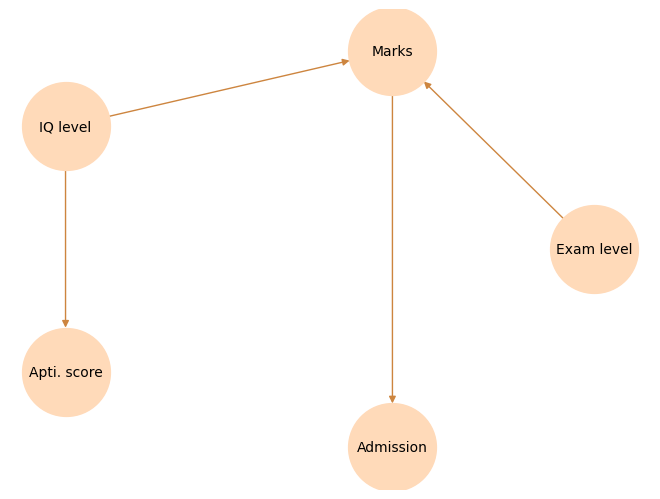

In [87]:
nx.draw_circular(Student_network, with_labels=True, node_size=4000, node_color="peachpuff", font_size=10, arrowsize=10, linewidths=1, edge_color="peru")
pylab.savefig(r"C:\Users\prebe\ikt215\Exam\figures\bayesian_network_student.png")

In [94]:
inference = VariableElimination(Student_network)
e = inference.query(['Exam level'])
i = inference.query(['IQ level'])
m = inference.query(['Marks'], evidence={'Exam level': '1', 'IQ level': '0'})
ap = inference.query(['Apti. score'], evidence={'IQ level': '0'})
ad = inference.query(['Admission'], evidence={'Marks': '1'})

joint_probability = e.values[1] * i.values[0] * m.values[1] * ap.values[0] * ad.values[1]
print('Probability of a = 1, m = 1, i = 0, e = 1, s = 0 \n', joint_probability)

e = inference.query(['Exam level'])
i = inference.query(['IQ level'])
m = inference.query(['Marks'], evidence={'Exam level': '0', 'IQ level': '1'})
ap = inference.query(['Apti. score'], evidence={'IQ level': '1'})
ad = inference.query(['Admission'], evidence={'Marks': '0'})

joint_probability = e.values[0] * i.values[1] * m.values[0] * ap.values[1] * ad.values[0]
print('Probability of a = 0, m = 0, i = 1, e = 0, s = 1 \n', joint_probability)

Probability of a = 1, m = 1, i = 0, e = 1, s = 0 
 0.0018000000000000004
Probability of a = 0, m = 0, i = 1, e = 0, s = 1 
 0.025199999999999997
